In [1]:
import sys
from __future__ import division, print_function, absolute_import
sys.path.append('/home/ajss/notebooks/deep-learning-projects/')

from tqdm import tqdm
from rbm import RBM
from deep_mix_nn import DeepMixNN
from dbn import DeepBeliefNN

import silhouette_plot  


from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Image
from tensorflow.python.ops import control_flow_ops
from utils import tile_raster_images
import IPython.display
import math
%matplotlib inline

def saveFileForSubmission(predicted_lables,custonFileName='submission.csv',customHeader='ImageId,Label'):
    result = np.c_[range(1,len(predicted_lables)+1),predicted_lables]

    np.savetxt(custonFileName, 
           result.astype(int), 
           delimiter=',', 
           header = customHeader, 
           comments = '', 
           fmt='%u,%u')

3!= 6.0 = e^(ln[gamma(4)]) = 6
120.0
4.03291461127e+26
24.0
0.994376487882
0.00562351211827
1.0
0.112754082424
0.520357177501
0.842681743299
0.999999999998
-0.112754082424
-0.520357177501
-0.842681743299
-0.999999999998
36.4981663726
0.999329074744


(42000, 784)
(42000, 10)


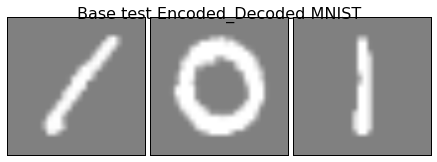

In [2]:
def next_batch(index,data,labels,batch_size=10):
    """Return the next `batch_size` examples from this data set."""
    total = data.shape[0]
    end = index + batch_size
    max_end =  max(0, index + batch_size - total)
    retData =  np.concatenate((data[index:end],data[:max_end]), axis=0)
    retlabel =  np.concatenate((labels[index:end],labels[:max_end]), axis=0)
    return retData,retlabel
def plot_gallery(title, images, n_col, n_row,image_shape = (28, 28)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()   
    
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# read training data from CSV file 
dataTrain = pd.read_csv('./kaggle-mnist/train.csv')
images = dataTrain.iloc[:,1:].values
images = images.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)

labels_flat = dataTrain[[0]].values.ravel()
labels_count = np.unique(labels_flat).shape[0]
labels = dense_to_one_hot(labels_flat, labels_count)
labels_int = labels_flat
labels_int = labels_flat.astype(np.uint8)

#labels = labels_flat #dense_to_one_hot(labels_flat, labels_count)
#labels = labels.astype(np.uint8)

print(images.shape)
print(labels.shape)
for i in range(1):
    batch_xs, batch_ys = next_batch(i*10, images,labels)
    plot_gallery('Base test Encoded_Decoded MNIST',batch_xs[:3],3,1)


RBM - Pre Treino
---------

In [3]:

flags = tf.app.flags
FLAGS = flags.FLAGS
#flags.DEFINE_string('data_dir', '/home/ajsss/data_deep/', 'Directory for storing data')


In [4]:
# from rbm import RBM

# keep_prob_value = 1
# # First RBM
# rbmobject1 = RBM(784, 1000, ['rbmw1', 'rbvb1', 'rbmhb1'],0.3,keep_prob=keep_prob_value)
# # Train First RBM
# # with tf.device("/job:RBMAJSS/task:0/cpu:0"):
# epoch = 50
# batch_size =30
# interactions = int(math.floor(images.shape[0]/batch_size))
# for i in tqdm(range(epoch)):
#     for j in range(interactions):
#         batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
#         cost = rbmobject1.partial_fit(batch_xs)
#     print(rbmobject1.compute_cost(images))
# rbmobject1.save_weights('./data-models/rbmw1.chp')
# # Second RBM
# rbmobject2 = RBM(1000, 500, ['rbmw2', 'rbvb2', 'rbmhb2'], 0.3,keep_prob=keep_prob_value)
# # Train Second RBM
# for i in tqdm(range(epoch)):
#     for j in range(interactions):
#         # Transform features with first rbm for second rbm
#         batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
#         batch_xs = rbmobject1.transform(batch_xs)
#         cost = rbmobject2.partial_fit(batch_xs)
#     print(rbmobject2.compute_cost(rbmobject1.transform(images)))

# rbmobject2.save_weights('./data-models/rbmw2.chp')
# # third RBM
# rbmobject3 = RBM(500, 250, ['rbmw3', 'rbvb3', 'rbmhb3'], 0.3,keep_prob=keep_prob_value)
# # Train third RBM
# for i in tqdm(range(epoch)):
#     for j in range(interactions):
#         # Transform features with first rbm for second rbm
#         batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
#         batch_xs = rbmobject1.transform(batch_xs)
#         batch_xs = rbmobject2.transform(batch_xs)
#         cost = rbmobject3.partial_fit(batch_xs)
#     print(rbmobject3.compute_cost(rbmobject2.transform(rbmobject1.transform(images))))

# rbmobject3.save_weights('./data-models/rbmw3.chp')
# # 4th RBM
# rbmobject4 = RBM(250, 2, ['rbmw4', 'rbvb4', 'rbmhb4'], 0.3,keep_prob=keep_prob_value)
# # Train 4th RBM
# for i in tqdm(range(epoch)):
#     for j in range(interactions):
#         # Transform features with first rbm for second rbm
#         batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
#         batch_xs = rbmobject1.transform(batch_xs)
#         batch_xs = rbmobject2.transform(batch_xs)
#         batch_xs = rbmobject3.transform(batch_xs)
#         cost = rbmobject4.partial_fit(batch_xs)
#     print(rbmobject4.compute_cost(rbmobject3.transform(rbmobject2.transform(rbmobject1.transform(images)))))

# rbmobject4.save_weights('./data-models/rbmw4.chp')


In [5]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
# batch_xs = rbmobject1.transform(X_test)
# batch_xs = rbmobject2.transform(batch_xs)
# batch_xs = rbmobject3.transform(batch_xs)
# X_transformed = rbmobject4.transform(batch_xs)
# colors= ["chartreuse","crimson","cyan","darkblue","darkmagenta","darkorange","darkviolet","fuchsia","green","yellow"]
# plt.figure(figsize=(8, 8))
# for c, i,target_name in zip(colors, range(10),map(lambda x:str(x),range(10))):
#     plt.scatter(X_transformed[y_test == i, 0], X_transformed[y_test == i, 1],
#                 c=c, label=target_name)
#     plt.title("Digits")
# plt.legend(loc="best")


DeepMixNN
------

In [6]:

# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250],  [['rbmw1', 'rbmhb1'],
                                                ['rbmw2', 'rbmhb2'],
                                                ['rbmw3', 'rbmhb3']],
                                           finetune_learning_rate=0.3,keep_prob=0.9,dir_='mixDbn1')
# Load RBM weights to Autoencoder
mixDbn.load_rbm_weights('./data-models/rbmw1.chp', ['rbmw1', 'rbmhb1'], 0)
mixDbn.load_rbm_weights('./data-models/rbmw2.chp', ['rbmw2', 'rbmhb2'], 1)
mixDbn.load_rbm_weights('./data-models/rbmw3.chp', ['rbmw3', 'rbmhb3'], 2)
# mixDbn.load_rbm_weights('./data-models/rbmw4.chp', ['rbmw4', 'rbmhb4'], 3)


In [7]:
#dbn.last_out.eval({dbn.x:batch_xs,dbn.keep_prob:1},session=dbn.sess)
#dbn.last_W.eval({},session=dbn.sess)

In [8]:
# Train DBN
batch_size =30
epoch = 100
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.375, random_state=4456)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        mixDbn.partial_fit(batch_xs,batch_ys,X_valid,y_valid,i,j,interactions)

mixDbn.save_weights('./data-models/mixDbn.chp')


  0%|          | 0/100 [00:00<?, ?it/s]

mixDbn


100%|██████████| 100/100 [1:24:22<00:00, 50.64s/it]


In [14]:
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
# cost_sup,cost_unsup = mixDbn.partial_fit(X_test,y_test)
# print(cost_sup,cost_unsup)
# cost_sup,cost_unsup = mixDbn.compute_cost(X_test,y_test)
# print(cost_sup,cost_unsup)

In [15]:
#mixDbn.load_weights('./data-models/mixDbn.chp')
y_true, y_pred = np.argmax(y_test, axis=1), mixDbn.predict(X_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       985
          1       0.99      0.99      0.99      1151
          2       0.98      0.98      0.98      1065
          3       0.98      0.97      0.98      1134
          4       0.98      0.98      0.98      1003
          5       0.99      0.97      0.98       903
          6       0.98      0.99      0.98      1036
          7       0.98      0.99      0.98      1136
          8       0.98      0.98      0.98      1011
          9       0.97      0.97      0.97      1076

avg / total       0.98      0.98      0.98     10500



In [16]:
# read test data from CSV file 
datatest = pd.read_csv('./kaggle-mnist/test.csv')
imagestest = datatest.iloc[:,:].values
imagestest = imagestest.astype(np.float)
imagestest = np.multiply(imagestest, 1.0 / 255.0)
# a = mixDbn.model_predictions.eval({mixDbn.x: imagestest,mixDbn.x_corr:imagestest,mixDbn.keep_prob: 1},session=mixDbn.sess)
saveFileForSubmission(mixDbn.predict(imagestest),custonFileName="custoMixDbn1.csv")

DeepMixNN No RBM
---------

In [6]:

# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250],  [['rbmw1', 'rbmhb1'],
                                                ['rbmw2', 'rbmhb2'],
                                                ['rbmw3', 'rbmhb3']],
                                           finetune_learning_rate=0.3,keep_prob=0.9,dir_='mixDbn-noRBM')
# Load RBM weights to Autoencoder
# mixDbn.load_rbm_weights('./data-models/rbmw1.chp', ['rbmw1', 'rbmhb1'], 0)
# mixDbn.load_rbm_weights('./data-models/rbmw2.chp', ['rbmw2', 'rbmhb2'], 1)
# mixDbn.load_rbm_weights('./data-models/rbmw3.chp', ['rbmw3', 'rbmhb3'], 2)
# mixDbn.load_rbm_weights('./data-models/rbmw4.chp', ['rbmw4', 'rbmhb4'], 3)


In [7]:
# Train DBN
batch_size =30
epoch = 100
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.375, random_state=4456)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        mixDbn.partial_fit(batch_xs,batch_ys,X_valid,y_valid,i,j,interactions)

mixDbn.save_weights('./data-models/mixDbn-norbm.chp')


  0%|          | 0/100 [00:00<?, ?it/s]

mixDbn


100%|██████████| 100/100 [1:24:38<00:00, 50.72s/it]


In [8]:
#mixDbn.load_weights('./data-models/mixDbn.chp')
y_true, y_pred = np.argmax(y_test, axis=1), mixDbn.predict(X_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       985
          1       0.99      0.99      0.99      1151
          2       0.98      0.98      0.98      1065
          3       0.97      0.97      0.97      1134
          4       0.99      0.97      0.98      1003
          5       0.97      0.97      0.97       903
          6       0.99      0.98      0.99      1036
          7       0.98      0.98      0.98      1136
          8       0.98      0.97      0.98      1011
          9       0.96      0.98      0.97      1076

avg / total       0.98      0.98      0.98     10500



In [9]:
# read test data from CSV file 
datatest = pd.read_csv('./kaggle-mnist/test.csv')
imagestest = datatest.iloc[:,:].values
imagestest = imagestest.astype(np.float)
imagestest = np.multiply(imagestest, 1.0 / 255.0)
# a = mixDbn.model_predictions.eval({mixDbn.x: imagestest,mixDbn.x_corr:imagestest,mixDbn.keep_prob: 1},session=mixDbn.sess)
saveFileForSubmission(mixDbn.predict(imagestest),custonFileName="custoMixDbn2.csv")

With Noise
--------

In [10]:

# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250],  [['rbmw1', 'rbmhb1'],
                                                ['rbmw2', 'rbmhb2'],
                                                ['rbmw3', 'rbmhb3']],
                                           finetune_learning_rate=0.3,keep_prob=0.9,corr_frac=0.3
                                           ,corr_type='masking',dir_='mixDbn-withnoise')
# Load RBM weights to Autoencoder
mixDbn.load_rbm_weights('./data-models/rbmw1.chp', ['rbmw1', 'rbmhb1'], 0)
mixDbn.load_rbm_weights('./data-models/rbmw2.chp', ['rbmw2', 'rbmhb2'], 1)
mixDbn.load_rbm_weights('./data-models/rbmw3.chp', ['rbmw3', 'rbmhb3'], 2)
# mixDbn.load_rbm_weights('./data-models/rbmw4.chp', ['rbmw4', 'rbmhb4'], 3)


In [11]:
# Train DBN
batch_size =30
epoch = 100
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.375, random_state=4456)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        mixDbn.partial_fit(batch_xs,batch_ys,X_valid,y_valid,i,j,interactions)

mixDbn.save_weights('./data-models/mixDbn-withnoise.chp')


  0%|          | 0/100 [00:00<?, ?it/s]

mixDbn


100%|██████████| 100/100 [1:21:49<00:00, 49.09s/it]


In [12]:
#mixDbn.load_weights('./data-models/mixDbn.chp')
y_true, y_pred = np.argmax(y_test, axis=1), mixDbn.predict(X_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       985
          1       0.99      0.99      0.99      1151
          2       0.98      0.98      0.98      1065
          3       0.99      0.97      0.98      1134
          4       0.97      0.98      0.98      1003
          5       0.98      0.97      0.97       903
          6       0.98      0.99      0.98      1036
          7       0.98      0.98      0.98      1136
          8       0.97      0.97      0.97      1011
          9       0.97      0.97      0.97      1076

avg / total       0.98      0.98      0.98     10500



In [13]:
# read test data from CSV file 
datatest = pd.read_csv('./kaggle-mnist/test.csv')
imagestest = datatest.iloc[:,:].values
imagestest = imagestest.astype(np.float)
imagestest = np.multiply(imagestest, 1.0 / 255.0)
# a = mixDbn.model_predictions.eval({mixDbn.x: imagestest,mixDbn.x_corr:imagestest,mixDbn.keep_prob: 1},session=mixDbn.sess)
saveFileForSubmission(mixDbn.predict(imagestest),custonFileName="custoMixDbn3.csv")

Using dA
---------

In [ ]:

# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250], [['daw1', 'dahb1'],
                                                ['daw2', 'dahb2'],
                                                ['daw3', 'dahb3']],
                                           finetune_learning_rate=0.3,keep_prob=0.9)
# Load da weights to Autoencoder
mixDbn.load_rbm_weights('./data-models/da1.chp', ['daw1', 'dahb1'], 0)
mixDbn.load_rbm_weights('./data-models/da2.chp', ['daw2', 'dahb2'], 1)
mixDbn.load_rbm_weights('./data-models/da3.chp', ['daw3', 'dahb3'], 2)
# mixDbn.load_rbm_weights('./data-models/da4.chp', ['daw4', 'dahb4'], 3)

# Train DBN
batch_size =30
epoch = 200
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        cost_sup,cost_unsup = mixDbn.partial_fit(batch_xs,batch_ys)
        cost_sup_ += cost_sup
        cost_unsup_ += cost_unsup
    if i==0:
        print(i,'cost_sup_: ',cost_sup_,'cost_unsup_',cost_unsup_)
print(i,'cost_sup_: ',cost_sup_,'cost_unsup_',cost_unsup_)

mixDbn.save_weights('./data-models/mixDbn4.chp')

In [ ]:

#mixDbn.load_weights('./data-models/mixDbn.chp')
y_true, y_pred = np.argmax(y_test, axis=1), mixDbn.predict(X_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

In [ ]:
# read test data from CSV file 
datatest = pd.read_csv('./kaggle-mnist/test.csv')
imagestest = datatest.iloc[:,:].values
imagestest = imagestest.astype(np.float)
imagestest = np.multiply(imagestest, 1.0 / 255.0)
saveFileForSubmission(mixDbn.predict(imagestest),custonFileName="custoMixDbn4.csv")

Autoencoder
--------

In [16]:

# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250,2],  [['rbmw1', 'rbmhb1'],
                                                ['rbmw2', 'rbmhb2'],
                                                ['rbmw3', 'rbmhb3'],
                                                 ['rbmw4', 'rbmhb4']],
                                           finetune_learning_rate=0.3,keep_prob=0.9)
# Load RBM weights to Autoencoder
mixDbn.load_rbm_weights('./data-models/rbmw1.chp', ['rbmw1', 'rbmhb1'], 0)
mixDbn.load_rbm_weights('./data-models/rbmw2.chp', ['rbmw2', 'rbmhb2'], 1)
mixDbn.load_rbm_weights('./data-models/rbmw3.chp', ['rbmw3', 'rbmhb3'], 2)
mixDbn.load_rbm_weights('./data-models/rbmw4.chp', ['rbmw4', 'rbmhb4'], 3)


In [ ]:
# Train DBN
batch_size =30
epoch = 200
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        cost_sup,cost_unsup = mixDbn.partial_fit(batch_xs,batch_ys)
        cost_sup_ += cost_sup
        cost_unsup_ += cost_unsup
    if i==0:
        print(i,'cost_sup_: ',cost_sup_,'cost_unsup_',cost_unsup_)
print(i,'cost_sup_: ',cost_sup_,'cost_unsup_',cost_unsup_)

mixDbn.save_weights('./data-models/mixDbn2.chp')


  0%|          | 0/200 [00:00<?, ?it/s]

mixDbn


  0%|          | 1/200 [00:17<56:24, 17.01s/it]

0 cost_sup_:  2375.7195102 cost_unsup_ 376.171497583


  2%|▎         | 5/200 [01:24<54:47, 16.86s/it]

In [ ]:
colors= ["chartreuse","crimson","cyan","darkblue","darkmagenta","darkorange","darkviolet","fuchsia","green","yellow"]
# colors = plt.cm.Spectral(np.linspace(0, 1, 10))

X_transformed = mixDbn.transform(X_test)
y_test_int = np.argmax(y_test, axis=1)

plt.figure(figsize=(8, 8))
for c, i,target_name in zip(colors, range(10),map(lambda x:str(x),range(10))):
    plt.scatter(X_transformed[y_test_int == i, 0], X_transformed[y_test_int == i, 1],
                c=c, label=target_name)
    plt.title("Digits")
plt.legend(loc="best")

In [ ]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

silhouette_plot.plotResult(X_transformed,y_test_int)


In [10]:


# Autoencoder
mixDbn = DeepMixNN(784,10, [1000, 500,250,2], [['daw1', 'dahb1'],
                                                ['daw2', 'dahb2'],
                                                ['daw3', 'dahb3'],
                                                ['daw4', 'dahb4']],
                                           finetune_learning_rate=0.3,keep_prob=0.9)
# Load da weights to Autoencoder
mixDbn.load_rbm_weights('./data-models/da1.chp', ['daw1', 'dahb1'], 0)
mixDbn.load_rbm_weights('./data-models/da2.chp', ['daw2', 'dahb2'], 1)
mixDbn.load_rbm_weights('./data-models/da3.chp', ['daw3', 'dahb3'], 2)
mixDbn.load_rbm_weights('./data-models/da4.chp', ['daw4', 'dahb4'], 3)

# Train DBN
batch_size =30
epoch = 100
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 1
print('mixDbn')
for i in tqdm(range(epoch)):
    cost_unsup_ = 0.0
    cost_sup_ = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        cost_sup,cost_unsup = mixDbn.partial_fit(batch_xs,batch_ys)
        cost_sup_ += cost_sup
        cost_unsup_ += cost_unsup
#     if (i+1)%math.floor(epoch/print_times)==0:
    print(i,'cost_sup_: ',cost_sup_,'cost_unsup_',cost_unsup_)

mixDbn.save_weights('./data-models/mixDbn6.chp')


  0%|          | 0/100 [00:00<?, ?it/s]

mixDbn


  1%|          | 1/100 [00:17<28:03, 17.01s/it]

0 cost_sup_:  1816.48763061 cost_unsup_ 378.359080583


  2%|▏         | 2/100 [00:33<27:42, 16.96s/it]

1 cost_sup_:  1598.1307807 cost_unsup_ 341.866290107


  3%|▎         | 3/100 [00:50<27:22, 16.93s/it]

2 cost_sup_:  1541.00766426 cost_unsup_ 334.884085342


  4%|▍         | 4/100 [01:07<27:03, 16.91s/it]

3 cost_sup_:  1509.34523559 cost_unsup_ 333.171330839


  5%|▌         | 5/100 [01:24<26:44, 16.89s/it]

4 cost_sup_:  1487.95037162 cost_unsup_ 331.648545131


  6%|▌         | 6/100 [01:41<26:25, 16.86s/it]

5 cost_sup_:  1478.29260522 cost_unsup_ 330.250277564


  7%|▋         | 7/100 [01:58<26:07, 16.86s/it]

6 cost_sup_:  1466.91923904 cost_unsup_ 328.937122002


  8%|▊         | 8/100 [02:14<25:51, 16.86s/it]

7 cost_sup_:  1454.25270373 cost_unsup_ 327.776389465


  9%|▉         | 9/100 [02:31<25:35, 16.87s/it]

8 cost_sup_:  1447.4335146 cost_unsup_ 326.678321064


 10%|█         | 10/100 [02:48<25:21, 16.90s/it]

9 cost_sup_:  1439.2157312 cost_unsup_ 325.637077019


 11%|█         | 11/100 [03:05<25:03, 16.90s/it]

10 cost_sup_:  1434.97371387 cost_unsup_ 324.660074189


 12%|█▏        | 12/100 [03:22<24:46, 16.89s/it]

11 cost_sup_:  1426.36609429 cost_unsup_ 323.734982833


 13%|█▎        | 13/100 [03:39<24:27, 16.87s/it]

12 cost_sup_:  1416.79701245 cost_unsup_ 322.882052571


 14%|█▍        | 14/100 [03:56<24:10, 16.87s/it]

13 cost_sup_:  1389.54472131 cost_unsup_ 322.206034139


 15%|█▌        | 15/100 [04:13<23:53, 16.86s/it]

14 cost_sup_:  1325.93859845 cost_unsup_ 321.675725624


 16%|█▌        | 16/100 [04:29<23:36, 16.87s/it]

15 cost_sup_:  1266.29272401 cost_unsup_ 321.066286445


 17%|█▋        | 17/100 [04:46<23:18, 16.85s/it]

16 cost_sup_:  1219.95608938 cost_unsup_ 320.441371232


 18%|█▊        | 18/100 [05:03<23:02, 16.86s/it]

17 cost_sup_:  1185.60438323 cost_unsup_ 319.878444865


 19%|█▉        | 19/100 [05:20<22:47, 16.88s/it]

18 cost_sup_:  1158.90622383 cost_unsup_ 319.389762715


 20%|██        | 20/100 [05:37<22:29, 16.87s/it]

19 cost_sup_:  1137.59417009 cost_unsup_ 318.890914157


 21%|██        | 21/100 [05:54<22:13, 16.88s/it]

20 cost_sup_:  1120.26829243 cost_unsup_ 318.467778713


 22%|██▏       | 22/100 [06:11<21:55, 16.87s/it]

21 cost_sup_:  1102.95768166 cost_unsup_ 318.102296576


 23%|██▎       | 23/100 [06:28<21:38, 16.86s/it]

22 cost_sup_:  1091.48335224 cost_unsup_ 317.789170906


 24%|██▍       | 24/100 [06:44<21:21, 16.86s/it]

23 cost_sup_:  1079.11438626 cost_unsup_ 317.533260524


 25%|██▌       | 25/100 [07:01<21:04, 16.86s/it]

24 cost_sup_:  1069.02630019 cost_unsup_ 317.267086446


 26%|██▌       | 26/100 [07:18<20:47, 16.86s/it]

25 cost_sup_:  1060.68050808 cost_unsup_ 317.05484958


 27%|██▋       | 27/100 [07:35<20:30, 16.86s/it]

26 cost_sup_:  1050.33629572 cost_unsup_ 316.863625675


 28%|██▊       | 28/100 [07:52<20:13, 16.86s/it]

27 cost_sup_:  1043.9406628 cost_unsup_ 316.703720018


 29%|██▉       | 29/100 [08:09<19:57, 16.86s/it]

28 cost_sup_:  1037.887155 cost_unsup_ 316.517105296


 30%|███       | 30/100 [08:26<19:39, 16.85s/it]

29 cost_sup_:  1029.70963508 cost_unsup_ 316.402950183


 31%|███       | 31/100 [08:42<19:23, 16.86s/it]

30 cost_sup_:  1022.88735276 cost_unsup_ 316.300540179


 32%|███▏      | 32/100 [08:59<19:06, 16.86s/it]

31 cost_sup_:  1018.30973631 cost_unsup_ 316.203974098


 33%|███▎      | 33/100 [09:16<18:48, 16.84s/it]

32 cost_sup_:  1014.58739841 cost_unsup_ 316.107165575


 34%|███▍      | 34/100 [09:33<18:32, 16.85s/it]

33 cost_sup_:  1009.32091635 cost_unsup_ 316.018421277


 35%|███▌      | 35/100 [09:50<18:15, 16.85s/it]

34 cost_sup_:  1003.36099082 cost_unsup_ 315.907181978


 36%|███▌      | 36/100 [10:07<17:58, 16.85s/it]

35 cost_sup_:  1000.07459897 cost_unsup_ 315.821145728


 37%|███▋      | 37/100 [10:24<17:42, 16.86s/it]

36 cost_sup_:  995.61676389 cost_unsup_ 315.765975565


 38%|███▊      | 38/100 [10:40<17:25, 16.86s/it]

37 cost_sup_:  990.156903088 cost_unsup_ 315.678143546


 39%|███▉      | 39/100 [10:57<17:08, 16.86s/it]

38 cost_sup_:  986.594838977 cost_unsup_ 315.615161285


 40%|████      | 40/100 [11:14<16:51, 16.85s/it]

39 cost_sup_:  981.750215113 cost_unsup_ 315.562716424


 41%|████      | 41/100 [11:31<16:34, 16.85s/it]

40 cost_sup_:  979.098982811 cost_unsup_ 315.494011045


 42%|████▏     | 42/100 [11:48<16:18, 16.86s/it]

41 cost_sup_:  977.009008348 cost_unsup_ 315.421802893


 43%|████▎     | 43/100 [12:05<16:00, 16.86s/it]

42 cost_sup_:  973.475023329 cost_unsup_ 315.378329873


 44%|████▍     | 44/100 [12:22<15:44, 16.86s/it]

43 cost_sup_:  973.170716643 cost_unsup_ 315.321591005


 45%|████▌     | 45/100 [12:38<15:26, 16.85s/it]

44 cost_sup_:  970.323165953 cost_unsup_ 315.288121432


 46%|████▌     | 46/100 [12:55<15:09, 16.85s/it]

45 cost_sup_:  968.210406184 cost_unsup_ 315.21099256


 47%|████▋     | 47/100 [13:12<14:53, 16.85s/it]

46 cost_sup_:  964.227778912 cost_unsup_ 315.155371994


 48%|████▊     | 48/100 [13:29<14:35, 16.84s/it]

47 cost_sup_:  961.871156752 cost_unsup_ 315.106305555


 49%|████▉     | 49/100 [13:46<14:18, 16.84s/it]

48 cost_sup_:  960.374107361 cost_unsup_ 315.07107009


 50%|█████     | 50/100 [14:03<14:02, 16.84s/it]

49 cost_sup_:  958.103835523 cost_unsup_ 315.000671297


 51%|█████     | 51/100 [14:19<13:45, 16.84s/it]

50 cost_sup_:  957.026032209 cost_unsup_ 314.961531892


 52%|█████▏    | 52/100 [14:36<13:27, 16.83s/it]

51 cost_sup_:  954.977763891 cost_unsup_ 314.900391847


 53%|█████▎    | 53/100 [14:53<13:11, 16.84s/it]

52 cost_sup_:  952.801433325 cost_unsup_ 314.831221059


 54%|█████▍    | 54/100 [15:10<12:55, 16.85s/it]

53 cost_sup_:  952.326650321 cost_unsup_ 314.773114413


 55%|█████▌    | 55/100 [15:27<12:37, 16.84s/it]

54 cost_sup_:  949.289969802 cost_unsup_ 314.754668102


 56%|█████▌    | 56/100 [15:44<12:20, 16.83s/it]

55 cost_sup_:  948.477599263 cost_unsup_ 314.701333836


 57%|█████▋    | 57/100 [16:00<12:03, 16.84s/it]

56 cost_sup_:  948.96340549 cost_unsup_ 314.646345198


 58%|█████▊    | 58/100 [16:17<11:47, 16.85s/it]

57 cost_sup_:  947.766022563 cost_unsup_ 314.597564831


 59%|█████▉    | 59/100 [16:34<11:30, 16.85s/it]

58 cost_sup_:  945.829241455 cost_unsup_ 314.553395927


 60%|██████    | 60/100 [16:51<11:13, 16.83s/it]

59 cost_sup_:  942.517971516 cost_unsup_ 314.505246609


 61%|██████    | 61/100 [17:08<10:56, 16.84s/it]

60 cost_sup_:  940.441944361 cost_unsup_ 314.455493167


 62%|██████▏   | 62/100 [17:25<10:39, 16.83s/it]

61 cost_sup_:  939.586394548 cost_unsup_ 314.405512705


 63%|██████▎   | 63/100 [17:41<10:22, 16.82s/it]

62 cost_sup_:  937.552439749 cost_unsup_ 314.34759213


 64%|██████▍   | 64/100 [17:58<10:06, 16.85s/it]

63 cost_sup_:  934.238950193 cost_unsup_ 314.299573272


 65%|██████▌   | 65/100 [18:15<09:50, 16.86s/it]

64 cost_sup_:  935.541204333 cost_unsup_ 314.223844349


 66%|██████▌   | 66/100 [18:32<09:33, 16.87s/it]

65 cost_sup_:  932.408416688 cost_unsup_ 314.16948159


 67%|██████▋   | 67/100 [18:49<09:16, 16.86s/it]

66 cost_sup_:  930.420597553 cost_unsup_ 314.138958171


 68%|██████▊   | 68/100 [19:06<08:59, 16.85s/it]

67 cost_sup_:  929.597689748 cost_unsup_ 314.077603251


 69%|██████▉   | 69/100 [19:23<08:42, 16.85s/it]

68 cost_sup_:  928.529064238 cost_unsup_ 314.042410433


 70%|███████   | 70/100 [19:39<08:25, 16.84s/it]

69 cost_sup_:  927.194420516 cost_unsup_ 313.969594702


 71%|███████   | 71/100 [19:56<08:08, 16.83s/it]

70 cost_sup_:  926.714504123 cost_unsup_ 313.904679313


 72%|███████▏  | 72/100 [20:13<07:51, 16.83s/it]

71 cost_sup_:  934.998931527 cost_unsup_ 313.827634782


 73%|███████▎  | 73/100 [20:30<07:34, 16.84s/it]

72 cost_sup_:  930.38652873 cost_unsup_ 313.76276724


 74%|███████▍  | 74/100 [20:47<07:18, 16.85s/it]

73 cost_sup_:  926.817364573 cost_unsup_ 313.744094729


 75%|███████▌  | 75/100 [21:04<07:01, 16.85s/it]

74 cost_sup_:  924.103063166 cost_unsup_ 313.67825754


 76%|███████▌  | 76/100 [21:21<06:44, 16.86s/it]

75 cost_sup_:  923.842715561 cost_unsup_ 313.637117013


 77%|███████▋  | 77/100 [21:37<06:27, 16.85s/it]

76 cost_sup_:  921.890701592 cost_unsup_ 313.589128479


 78%|███████▊  | 78/100 [21:54<06:10, 16.83s/it]

77 cost_sup_:  923.507840276 cost_unsup_ 313.518920034


 79%|███████▉  | 79/100 [22:11<05:53, 16.83s/it]

78 cost_sup_:  921.521469176 cost_unsup_ 313.476026803


 80%|████████  | 80/100 [22:28<05:36, 16.84s/it]

79 cost_sup_:  918.689685524 cost_unsup_ 313.420531347


 81%|████████  | 81/100 [22:45<05:19, 16.83s/it]

80 cost_sup_:  919.067289889 cost_unsup_ 313.374990791


 82%|████████▏ | 82/100 [23:02<05:03, 16.84s/it]

81 cost_sup_:  917.761090159 cost_unsup_ 313.321756527


 83%|████████▎ | 83/100 [23:18<04:46, 16.85s/it]

82 cost_sup_:  917.464155614 cost_unsup_ 313.289116949


 84%|████████▍ | 84/100 [23:35<04:29, 16.86s/it]

83 cost_sup_:  915.58563596 cost_unsup_ 313.232324764


 85%|████████▌ | 85/100 [23:52<04:12, 16.86s/it]

84 cost_sup_:  914.657637 cost_unsup_ 313.175043195


 86%|████████▌ | 86/100 [24:09<03:56, 16.87s/it]

85 cost_sup_:  914.161789179 cost_unsup_ 313.128880098


 87%|████████▋ | 87/100 [24:26<03:39, 16.86s/it]

86 cost_sup_:  914.216958642 cost_unsup_ 313.05722256


 88%|████████▊ | 88/100 [24:43<03:22, 16.84s/it]

87 cost_sup_:  911.505283296 cost_unsup_ 312.988682568


 89%|████████▉ | 89/100 [25:00<03:05, 16.85s/it]

88 cost_sup_:  911.346384883 cost_unsup_ 312.958637878


 90%|█████████ | 90/100 [25:16<02:48, 16.84s/it]

89 cost_sup_:  911.958230138 cost_unsup_ 312.897788852


 91%|█████████ | 91/100 [25:33<02:31, 16.83s/it]

90 cost_sup_:  909.697689116 cost_unsup_ 312.859418347


 92%|█████████▏| 92/100 [25:50<02:14, 16.83s/it]

91 cost_sup_:  908.450052977 cost_unsup_ 312.802712411


 93%|█████████▎| 93/100 [26:07<01:57, 16.83s/it]

92 cost_sup_:  908.449140489 cost_unsup_ 312.758607835


 94%|█████████▍| 94/100 [26:24<01:41, 16.84s/it]

93 cost_sup_:  907.684488714 cost_unsup_ 312.72058329


 95%|█████████▌| 95/100 [26:41<01:24, 16.85s/it]

94 cost_sup_:  909.008212209 cost_unsup_ 312.6868494


 96%|█████████▌| 96/100 [26:57<01:07, 16.84s/it]

95 cost_sup_:  907.985374451 cost_unsup_ 312.66307278


 97%|█████████▋| 97/100 [27:14<00:50, 16.84s/it]

96 cost_sup_:  907.00309217 cost_unsup_ 312.622956529


 98%|█████████▊| 98/100 [27:31<00:33, 16.83s/it]

97 cost_sup_:  906.466899335 cost_unsup_ 312.593583688


 99%|█████████▉| 99/100 [27:48<00:16, 16.83s/it]

98 cost_sup_:  905.992897093 cost_unsup_ 312.608313769


100%|██████████| 100/100 [28:05<00:00, 16.83s/it]

99 cost_sup_:  903.574826419 cost_unsup_ 312.724914268


(4200, 2) (4200, 10)


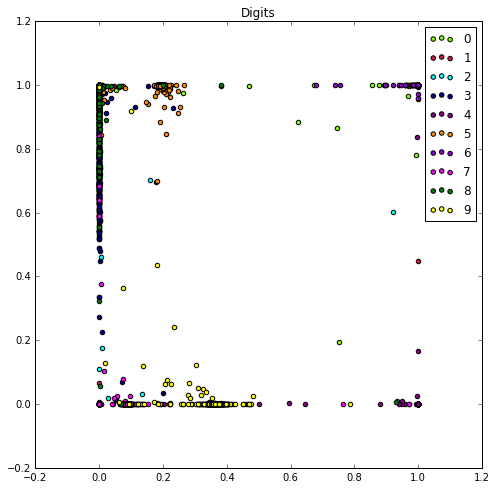

In [14]:
colors= ["chartreuse","crimson","cyan","darkblue","darkmagenta","darkorange","darkviolet","fuchsia","green","yellow"]
# colors = plt.cm.Spectral(np.linspace(0, 1, 10))

X_transformed = mixDbn.transform(X_test)
print(X_transformed.shape,y_test.shape)
y_test_int = np.argmax(y_test, axis=1)
plt.figure(figsize=(8, 8))
for c, i,target_name in zip(colors, range(10),map(lambda x:str(x),range(10))):
    plt.scatter(X_transformed[y_test_int == i, 0], X_transformed[y_test_int == i, 1],
                c=c, label=target_name)
    plt.title("Digits")
plt.legend(loc="best")

('For n_clusters =', 10, 'The average silhouette_score is :', 0.41739705)


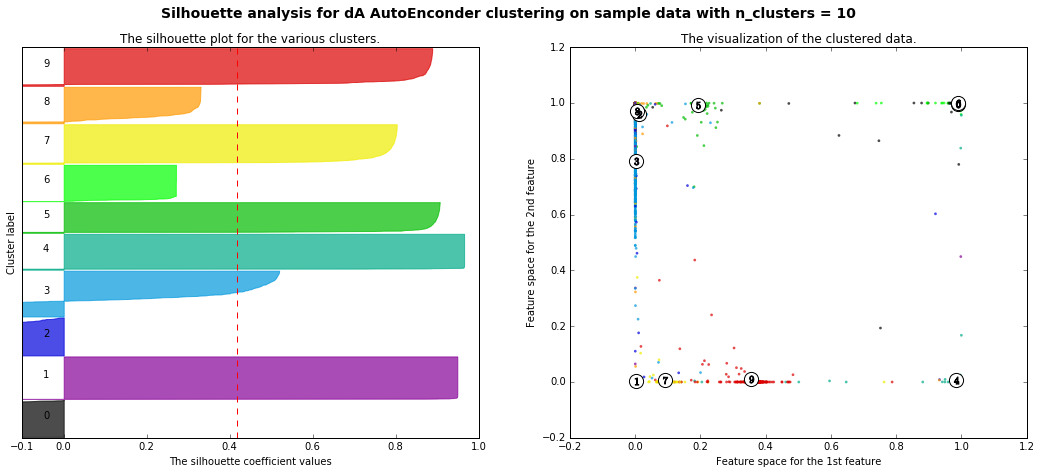

In [15]:

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

silhouette_plot.plotResult(X_transformed,y_test_int)
